In [2]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
conn = sqlite3.connect('C://Users//akhil//Desktop//HAP 880//Week 2//testclaims_hu.db')
df = pd.read_sql('select * from highUtilizationPredictionV2wco', conn)

In [4]:
race = pd.get_dummies(df['race'], dummy_na=False)
df=pd.concat([df,race], axis=1)

In [5]:
from sklearn.model_selection import train_test_split
tr, ts = train_test_split(df, test_size=0.2)

In [6]:
cls = list(df.columns)
cls.remove('index')
cls.remove('race')
cls.remove('patient_id')
cls.remove('claimCount')
cls.remove('HighUtilizationY2')

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [8]:
lr = LogisticRegression(solver='lbfgs', C=0.9, max_iter=1000)
lr.fit(tr[cls], tr['HighUtilizationY2'])

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
probs_lr = lr.predict_proba(tr[cls])[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(tr['HighUtilizationY2'], probs_lr)
auc_lr=auc(fpr_lr, tpr_lr)
auc_lr

0.822243634796585

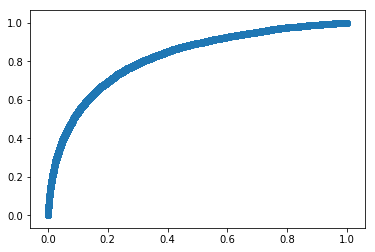

In [10]:
plt.scatter(fpr_lr, tpr_lr)

In [11]:
rf = RandomForestClassifier(n_estimators=400)
rf.fit(tr[cls], tr['HighUtilizationY2'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
probs_rf = rf.predict_proba(ts[cls])[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(ts['HighUtilizationY2'], probs_rf)
auc_rf = auc(fpr_rf, tpr_rf)
auc_rf

0.8072297859057876

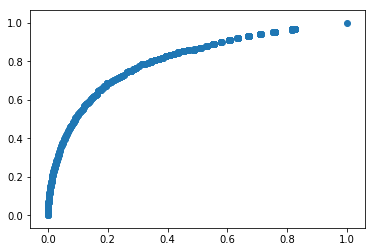

In [13]:
plt.scatter(fpr_rf, tpr_rf)

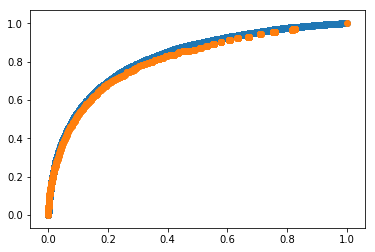

In [14]:
plt.scatter(fpr_lr, tpr_lr)
plt.scatter(fpr_rf, tpr_rf)

# get classification thresholds for recall 0.8

In [15]:
r = 0
while tpr_rf[r] < 0.8:
    r = r+1

In [16]:
 r

430

In [17]:
tpr_rf[r], fpr_rf[r], thresholds_rf[r]

(0.8065642458100558, 0.35705851792377086, 0.05)

In [18]:
l = 0
while tpr_lr[l] < 0.8:
    l = l+1

In [19]:
tpr_lr[l], fpr_lr[l], thresholds_lr[l]

(0.8000687639676809, 0.3160799981087918, 0.04768294758848518)

In [20]:
ts['HighUtilizationY2'].mean()

0.06334881663348817

In [21]:
probs_rf > 0.05

array([False, False,  True, ..., False, False,  True])

# generate one synthetic patient with all 0s and age 65

In [22]:
age = 65
ELIX = [0 for i in range(29)]
G = [0 for i in range(22)]
drugs = [0 for i in range(12)]
A = 0
AmN = 0
B = 0
H = 0
O = 0
U = 0
W = 0
d = [age] + ELIX + G + drugs + [A, AmN, B, H, O, U, W]

In [23]:
dat = [d]

In [28]:
lr.predict_proba(dat)

array([[0.99381712, 0.00618288]])

In [29]:
rf.predict_proba(dat)

array([[1., 0.]])

# now generate random data

In [35]:
# fixed age
age = 65

# randomly select ELIX codes
ELIX = [np.random.randint(2) for i in range(29)]

# randomly select procedures
G = [np.random.randint(2) for i in range(22)]

# randomly select drug counts
drugs = [np.random.randint(13) for i in range(12)] 

# zero all races
A = 0
AmN = 0
B = 0
H = 0
O = 0
U = 0
W = 0
# and randomly select race
r = np.random.randint(7)
if r == 0:
    A = 1
if r == 1:
    AmN = 1
if r == 2:
    B = 1
if r == 3:
    H = 1
if r == 4:
    O = 1
if r == 5:
    U = 1
if r == 6:
    W = 1    
d = [age] + ELIX + G + drugs + [A, AmN, B, H, O, U, W]
dat = [d]

In [36]:
lr.predict_proba(dat)

array([[0.38471925, 0.61528075]])

In [37]:
rf.predict_proba(dat)[:,1][0]

0.3675

# now simulate 1000 random patients

In [38]:
lr_res = []
rf_res = []
for i in range(1000):
    age = 65
    ELIX = [np.random.randint(2) for i in range(29)]
    G = [np.random.randint(2) for i in range(22)]
    drugs = [np.random.randint(30) for i in range(12)] 
    A = 0
    AmN = 0
    B = 0
    H = 0
    O = 0
    U = 0
    W = 0
    r = np.random.randint(7)
    if r == 0:
        A = 1
    if r == 1:
        AmN = 1
    if r == 2:
        B = 1
    if r == 3:
        H = 1
    if r == 4:
        O = 1
    if r == 5:
        U = 1
    if r == 6:
        W = 1    
    d = [age] + ELIX + G + drugs + [A, AmN, B, H, O, U, W]
    dat = [d]
    lr_res.append(lr.predict_proba(dat)[:,1][0])
    rf_res.append(rf.predict_proba(dat)[:,1][0])

In [39]:
# calculate mean and std for lr
np.mean(lr_res), np.std(lr_res)

(0.502088237272969, 0.25835451033039747)

In [40]:
#calculate mean and std for rf
np.mean(rf_res), np.std(rf_res)

(0.3406825, 0.07696218515446401)

In [41]:
#get min and max age from training data
maxa = tr['age'].max()
mina = tr['age'].min()

# generate random data for all ages in the data

In [42]:
lr_ages = []
rf_ages = []
for age in range(mina, maxa+1):
    lr_res = []
    rf_res = []
    for i in range(1000):
        ELIX = [np.random.randint(2) for i in range(29)]
        G = [np.random.randint(2) for i in range(22)]
        drugs = [np.random.randint(30) for i in range(12)] 
        A = 0
        AmN = 0
        B = 0
        H = 0
        O = 0
        U = 0
        W = 0
        r = np.random.randint(7)
        if r == 0:
            A = 1
        if r == 1:
            AmN = 1
        if r == 2:
            B = 1
        if r == 3:
            H = 1
        if r == 4:
            O = 1
        if r == 5:
            U = 1
        if r == 6:
            W = 1    
        d = [age] + ELIX + G + drugs + [A, AmN, B, H, O, U, W]
        dat = [d]
        lr_res.append(lr.predict_proba(dat)[:,1][0])
        rf_res.append(rf.predict_proba(dat)[:,1][0])
    lr_ages.append(sum(lr_res)/len(lr_res))
    rf_ages.append(sum(rf_res)/len(rf_res))

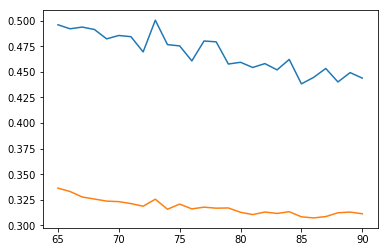

In [45]:
plt.plot(range(mina, maxa+1), lr_ages)
plt.plot(range(mina, maxa+1), rf_ages)

In [46]:
probs_l = lr.predict_proba(tr[cls])[:,1]
probs_r = rf.predict_proba(tr[cls])[:,1]

In [47]:
tr_res = pd.DataFrame()
tr_res['age'] = tr['age']
tr_res['lr'] = probs_l
tr_res['rf'] = probs_r
gr=tr_res.groupby('age')

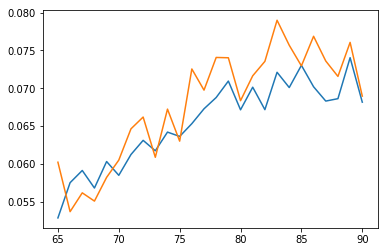

In [49]:
plt.plot(range(mina, maxa+1),list(gr['lr'].mean()))
plt.plot(range(mina, maxa+1),list(gr['rf'].mean()))

In [50]:
probs_l_t = lr.predict_proba(ts[cls])[:,1]
probs_r_t = rf.predict_proba(ts[cls])[:,1]

In [51]:
ts_res = pd.DataFrame()
ts_res['age'] = ts['age']
ts_res['lr'] = probs_l_t
ts_res['rf'] = probs_r_t
grts=ts_res.groupby('age')

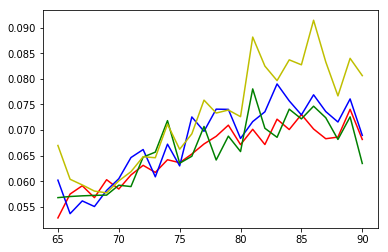

In [52]:
plt.plot(range(mina, maxa+1),list(gr['lr'].mean()), color='r')
plt.plot(range(mina, maxa+1),list(gr['rf'].mean()), color='b')
plt.plot(range(mina, maxa+1),list(grts['lr'].mean()), color='g')
plt.plot(range(mina, maxa+1),list(grts['rf'].mean()), color='y')

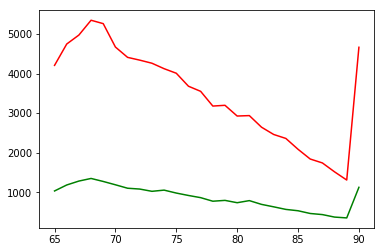

In [54]:
plt.plot(range(mina, maxa+1),list(gr['lr'].count()), color='r')
plt.plot(range(mina, maxa+1),list(grts['lr'].count()), color='g')

# generate data from -5 + 5 range

In [55]:
lr_ages = []
rf_ages = []
for age in range(mina, maxa+1):
    lr_res = []
    rf_res = []
    mn = max(age-5, mina)
    mx = min(age+5, maxa)
    dat = tr[(tr['age'] >= mn) & (tr['age'] <= mx)][cls]
    dat['age'] = age
    probs_l = lr.predict_proba(dat)[:,1]
    probs_r = rf.predict_proba(dat)[:,1]
       
    lr_ages.append(np.mean(probs_l))
    rf_ages.append(np.mean(probs_r))

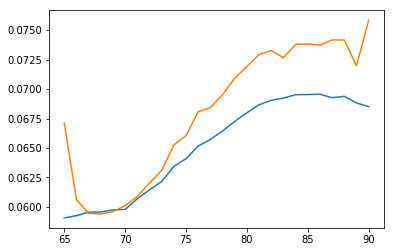

In [56]:
plt.plot(range(mina, maxa+1), lr_ages)
plt.plot(range(mina, maxa+1), rf_ages)

In [57]:
lr_ages = []
rf_ages = []
lr_ages_s = []
rf_ages_s = []
for age in range(mina, maxa+1):
    lr_res = []
    rf_res = []
    mn = max(age-5, mina)
    mx = min(age+5, maxa)
    dat = tr[(tr['age'] >= mn) & (tr['age'] <= mx)][cls]
    dat['age'] = age
    probs_l = lr.predict_proba(dat)[:,1]
    probs_r = rf.predict_proba(dat)[:,1]
       
    lr_ages.append(np.mean(probs_l))
    rf_ages.append(np.mean(probs_r))
    lr_ages_s.append(np.std(probs_l))
    rf_ages_s.append(np.std(probs_r))

In [58]:
np.array(lr_ages) + np.array(lr_ages_s)

array([0.15288717, 0.15291641, 0.15358524, 0.15326905, 0.15364996,
       0.15336019, 0.15481862, 0.15600833, 0.15694053, 0.1594042 ,
       0.16011238, 0.16216223, 0.16273165, 0.16321713, 0.16471616,
       0.16560209, 0.16669071, 0.16668962, 0.16622906, 0.16617294,
       0.16492335, 0.16462625, 0.16318894, 0.16331954, 0.16245649,
       0.16079019])

# plt.plot(range(mina, maxa+1), lr_ages)

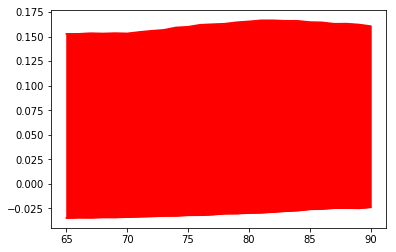

In [59]:
plt.plot(range(mina, maxa+1), np.array(lr_ages) + np.array(lr_ages_s), color='r')
plt.plot(range(mina, maxa+1), np.array(lr_ages) - np.array(lr_ages_s), color='r')
plt.fill_between(range(mina, maxa+1), np.array(lr_ages) + np.array(lr_ages_s), np.array(lr_ages) - np.array(lr_ages_s), color='r')

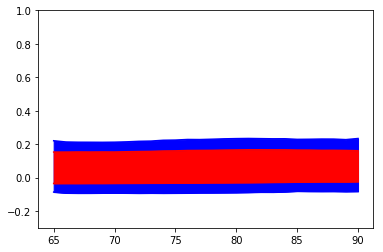

In [60]:
plt.ylim(-0.3,1.0)
plt.plot(range(mina, maxa+1), np.array(rf_ages) + np.array(rf_ages_s), color='b')
plt.plot(range(mina, maxa+1), np.array(rf_ages) - np.array(rf_ages_s), color='b')
plt.fill_between(range(mina, maxa+1), np.array(rf_ages) + np.array(rf_ages_s), np.array(rf_ages) - np.array(rf_ages_s), color='b')
plt.plot(range(mina, maxa+1), np.array(lr_ages) + np.array(lr_ages_s), color='r')
plt.plot(range(mina, maxa+1), np.array(lr_ages) - np.array(lr_ages_s), color='r')
plt.fill_between(range(mina, maxa+1), np.array(lr_ages) + np.array(lr_ages_s), np.array(lr_ages) - np.array(lr_ages_s), color='r')


# look at predicted values per race

In [61]:
tr_res['race'] = tr['race']
ts_res['race'] = ts['race']
gr_r_tr = tr_res.groupby('race')
gr_r_ts = ts_res.groupby('race')

In [62]:
p1 = gr_r_tr.lr.mean()
p2 = gr_r_tr.rf.mean()

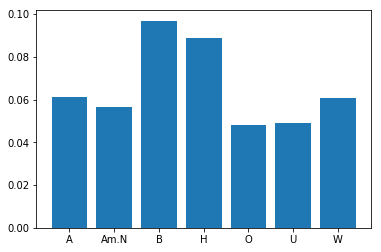

In [64]:
#logistic
plt.bar(range(len(p1.index)), p1.values)
plt.xticks(range(len(p1.index)), p1.index)
plt.show()

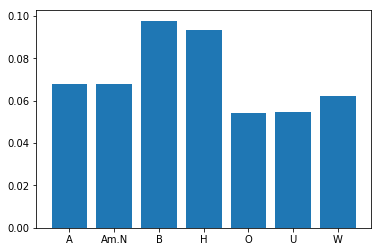

In [65]:
# rf
plt.bar(range(len(p2.index)), p2.values)
plt.xticks(range(len(p2.index)), p2.index)
plt.show()

# Geranrating data which is random variations of orginal data

In [66]:
trD = pd.DataFrame(tr)
sz=len(trD.index)

In [75]:
# generate random matrix with 0.05 porbability  of changing  a value
ELIX = (np.random.rand(sz,29) < 0.5).astype('int')

In [76]:
# modify the binary values
trD.loc[:][['ELIX1','ELIX2','ELIX3','ELIX4','ELIX5','ELIX6','ELIX7','ELIX8','ELIX9','ELIX10','ELIX11','ELIX12',
     'ELIX13','ELIX14','ELIX15','ELIX16','ELIX17','ELIX18','ELIX19','ELIX20','ELIX21','ELIX22','ELIX23',
     'ELIX24','ELIX25','ELIX26','ELIX27','ELIX28','ELIX29']] -= ELIX

In [77]:
# take absolute value to fix -1s
trD.loc[:][['ELIX1','ELIX2','ELIX3','ELIX4','ELIX5','ELIX6','ELIX7','ELIX8','ELIX9','ELIX10','ELIX11','ELIX12',
     'ELIX13','ELIX14','ELIX15','ELIX16','ELIX17','ELIX18','ELIX19','ELIX20','ELIX21','ELIX22','ELIX23',
     'ELIX24','ELIX25','ELIX26','ELIX27','ELIX28','ELIX29']] = abs(trD.loc[:][['ELIX1','ELIX2','ELIX3','ELIX4','ELIX5','ELIX6','ELIX7','ELIX8','ELIX9','ELIX10','ELIX11','ELIX12',
     'ELIX13','ELIX14','ELIX15','ELIX16','ELIX17','ELIX18','ELIX19','ELIX20','ELIX21','ELIX22','ELIX23',
     'ELIX24','ELIX25','ELIX26','ELIX27','ELIX28','ELIX29']])

In [79]:
G = (np.random.rand(sz,22) < 0.1).astype('int')

# modify the binary values
trD.loc[:][['G-2','G-3','G-4','G-5','G-6','G-7','G-8','G-9','G-10','G-11','G-12',
     'G-13','G-14','G-15','G-16','G-17','G-18','G-19','G-20','G-21','G-22','G-23']] -= G

# take absolute value to fix -1s
trD.loc[:][['G-2','G-3','G-4','G-5','G-6','G-7','G-8','G-9','G-10','G-11','G-12',
     'G-13','G-14','G-15','G-16','G-17','G-18','G-19','G-20','G-21','G-22','G-23']] = abs(trD.loc[:][['G-2','G-3','G-4','G-5','G-6','G-7','G-8','G-9','G-10','G-11','G-12',
     'G-13','G-14','G-15','G-16','G-17','G-18','G-19','G-20','G-21','G-22','G-23']])

In [80]:
ageDv = trD['age'].std()

In [82]:
trD['age']+np.random.normal(0,ageDv,trD['age'].size)

65120     67.317668
80757     85.348197
33296     95.567121
57389     75.372272
53539     69.155216
105962    75.353313
63626     73.115643
25331     84.386030
43914     66.073777
15583     58.978044
47767     65.973608
80986     72.779245
93789     67.198112
102472    67.886054
25967     72.590737
42422     75.260081
33041     79.122058
65847     74.174588
70467     59.741210
12706     63.916318
64450     69.737276
88693     77.879442
78591     56.633769
56230     64.114407
42524     96.243875
111906    84.011245
54708     77.397531
26297     83.703265
94460     83.752695
16151     64.912138
            ...    
71816     72.335887
60592     82.149475
12426     90.038958
64969     78.884029
34574     66.996971
26445     76.920333
47573     78.213532
71504     84.535864
96441     88.514346
89293     99.134337
106057    84.137096
99951     89.278736
91119     65.282967
84883     80.448146
25682     74.836793
26870     72.204328
58083     91.106618
29237     93.728480
74923     75.148810


In [85]:
d = ['drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 
              'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11','drugs_m11-12']
drugsDv = trD[d].std(axis=0)

In [95]:
dm=trD[d]+np.random.normal(0,1,(trD.index.size,12))*np.array(drugsDv)

In [96]:
dm.head(10)

,drugs_m0-1,drugs_m1-2,drugs_m2-3,drugs_m3-4,drugs_m4-5,drugs_m5-6,drugs_m6-7,drugs_m7-8,drugs_m8-9,drugs_m9-10,drugs_m10-11,drugs_m11-12
65120,1.958006,0.188135,3.776626,2.665179,-0.299566,2.887607,3.710660,2.661699,-0.284659,5.324839,1.870653,6.921724
80757,0.585937,-0.773589,5.737391,-1.621703,-3.133672,-0.281444,3.060734,-0.285408,0.736153,-1.557619,-2.917845,1.869269
33296,1.502693,0.690316,0.167166,8.456645,0.425885,2.294744,4.787429,2.307580,3.470672,2.658492,2.111205,3.985114
57389,0.749933,2.477138,-0.198292,3.401467,0.518273,0.247849,1.625442,-2.543425,2.503456,3.103372,6.604357,-3.157616
53539,5.225592,4.514062,7.796477,2.020386,8.690966,6.999107,4.693729,6.748582,-0.354987,0.888967,10.410497,-1.707247
105962,0.762437,-0.313689,-0.632526,-2.064454,0.991991,-0.716534,2.183639,1.282684,3.228870,0.757973,1.202927,2.211697
63626,-3.169719,-0.803697,-1.626294,-0.915257,-1.704646,-2.570588,-1.997563,-1.409359,2.482650,-2.151355,-2.003834,-4.536789
25331,0.235342,1.016604,0.701735,-0.641619,-2.872390,-1.728725,-1.463615,7.023095,1.591572,-0.553682,0.534067,0.335375
43914,9.972240,4.355413,4.386734,8.093746,6.450401,2.211224,4.536848,9.089450,0.552766,5.037592,6.416098,6.322598
15583,-4.413320,3.989456,-3.331540,-1.713259,-1.742046,-1.511947,4.376543,-4.728465,3.287195,-1.262843,0.661943,-1.072068


In [97]:
dm[dm<0]=0

In [98]:
def distort(fff):
    trD = pd.DataFrame(fff)
    sz=len(trD.index)
    ELIX = (np.random.rand(sz,29) < 0.1).astype('int')
    trD.loc[:][['ELIX1','ELIX2','ELIX3','ELIX4','ELIX5','ELIX6','ELIX7','ELIX8','ELIX9','ELIX10','ELIX11','ELIX12',
     'ELIX13','ELIX14','ELIX15','ELIX16','ELIX17','ELIX18','ELIX19','ELIX20','ELIX21','ELIX22','ELIX23',
     'ELIX24','ELIX25','ELIX26','ELIX27','ELIX28','ELIX29']] -= ELIX

    trD.loc[:][['ELIX1','ELIX2','ELIX3','ELIX4','ELIX5','ELIX6','ELIX7','ELIX8','ELIX9','ELIX10','ELIX11','ELIX12',
     'ELIX13','ELIX14','ELIX15','ELIX16','ELIX17','ELIX18','ELIX19','ELIX20','ELIX21','ELIX22','ELIX23',
     'ELIX24','ELIX25','ELIX26','ELIX27','ELIX28','ELIX29']] = abs(trD.loc[:][['ELIX1','ELIX2','ELIX3','ELIX4','ELIX5','ELIX6','ELIX7','ELIX8','ELIX9','ELIX10','ELIX11','ELIX12',
     'ELIX13','ELIX14','ELIX15','ELIX16','ELIX17','ELIX18','ELIX19','ELIX20','ELIX21','ELIX22','ELIX23',
     'ELIX24','ELIX25','ELIX26','ELIX27','ELIX28','ELIX29']])
    
    G = (np.random.rand(sz,22) < 0.1).astype('int')

    # modify the binary values
    trD.loc[:][['G-2','G-3','G-4','G-5','G-6','G-7','G-8','G-9','G-10','G-11','G-12',
     'G-13','G-14','G-15','G-16','G-17','G-18','G-19','G-20','G-21','G-22','G-23']] -= G

    # take absolute value to fix -1s
    trD.loc[:][['G-2','G-3','G-4','G-5','G-6','G-7','G-8','G-9','G-10','G-11','G-12',
     'G-13','G-14','G-15','G-16','G-17','G-18','G-19','G-20','G-21','G-22','G-23']] = abs(trD.loc[:][['G-2','G-3','G-4','G-5','G-6','G-7','G-8','G-9','G-10','G-11','G-12',
     'G-13','G-14','G-15','G-16','G-17','G-18','G-19','G-20','G-21','G-22','G-23']])

    ageDv = trD['age'].std()
    trD['age']+np.random.normal(0,ageDv,trD['age'].size)
    
    d = ['drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 
              'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11','drugs_m11-12']
    drugsDv = trD[d].std(axis=0)
    trD[d]=trD[d]+np.random.normal(0,1,(trD.index.size,12))*np.array(drugsDv)
    return trD

In [99]:
dst = []
for i in range(10): 
    dst.append( distort(tr) )

In [100]:
dstTr = pd.concat(dst)

In [101]:
probs_l = lr.predict_proba(dstTr[cls])
probs_r = rf.predict_proba(dstTr[cls])

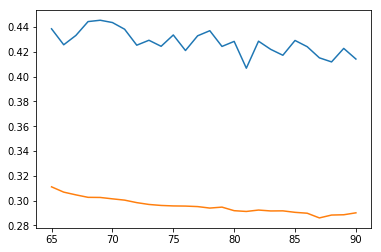

In [102]:
tr_res = pd.DataFrame()
tr_res['age'] = dstTr['age']
tr_res['lr'] = probs_l[:,1]
tr_res['rf'] = probs_r[:,1]
gr=tr_res.groupby('age')

plt.plot(range(mina, maxa+1), list(gr['lr'].mean()))
plt.plot(range(mina, maxa+1), list(gr['rf'].mean()))

# Test how Logistic and Rnadom forest models hehave outside the original 65 -90 age range. Is it resonalble to assume that for such patients the mdoels will perform Correctly ?

In [23]:
lr_ages = []
rf_ages = []
for age in range(18, 65):
    lr_res = []
    rf_res = []
    for i in range(100):
        ELIX = [np.random.randint(2) for i in range(29)]
        G = [np.random.randint(2) for i in range(22)]
        drugs = [np.random.randint(30) for i in range(12)] 
        A = 0
        AmN = 0
        B = 0
        H = 0
        O = 0
        U = 0
        W = 0
        r = np.random.randint(7)
        if r == 0:
            A = 1
        if r == 1:
            AmN = 1
        if r == 2:
            B = 1
        if r == 3:
            H = 1
        if r == 4:
            O = 1
        if r == 5:
            U = 1
        if r == 6:
            W = 1    
        d = [age] + ELIX + G + drugs + [A, AmN, B, H, O, U, W]
        dat = [d]
        lr_res.append(lr.predict_proba(dat)[:,1][0])
        rf_res.append(rf.predict_proba(dat)[:,1][0])
    lr_ages.append(sum(lr_res)/len(lr_res))
    rf_ages.append(sum(rf_res)/len(rf_res))

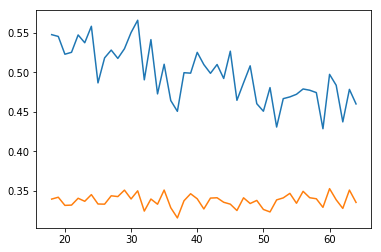

In [24]:
plt.plot(range(18,65), lr_ages)
plt.plot(range(18,65), rf_ages)

In [26]:
np.mean(lr_res),np.std(lr_res)

(0.4601127058400247, 0.2580484321277141)

# 2. Select randomly one patient from the data. Apply distortion of data to the patient 1000 times. Analyze probabilities output from the model for the distorted patient as compared with the original patient. Does the prediction/class change?

In [35]:
random_Patient = tr[tr['index'] =='54197']

In [36]:
def distort(fff):
    trD = pd.DataFrame(fff)
    sz=len(trD.index)
    ELIX = (np.random.rand(sz,29) < 0.1).astype('int')
    trD.loc[:][['ELIX1','ELIX2','ELIX3','ELIX4','ELIX5','ELIX6','ELIX7','ELIX8','ELIX9','ELIX10','ELIX11','ELIX12',
     'ELIX13','ELIX14','ELIX15','ELIX16','ELIX17','ELIX18','ELIX19','ELIX20','ELIX21','ELIX22','ELIX23',
     'ELIX24','ELIX25','ELIX26','ELIX27','ELIX28','ELIX29']] -= ELIX

    trD.loc[:][['ELIX1','ELIX2','ELIX3','ELIX4','ELIX5','ELIX6','ELIX7','ELIX8','ELIX9','ELIX10','ELIX11','ELIX12',
     'ELIX13','ELIX14','ELIX15','ELIX16','ELIX17','ELIX18','ELIX19','ELIX20','ELIX21','ELIX22','ELIX23',
     'ELIX24','ELIX25','ELIX26','ELIX27','ELIX28','ELIX29']] = abs(trD.loc[:][['ELIX1','ELIX2','ELIX3','ELIX4','ELIX5','ELIX6','ELIX7','ELIX8','ELIX9','ELIX10','ELIX11','ELIX12',
     'ELIX13','ELIX14','ELIX15','ELIX16','ELIX17','ELIX18','ELIX19','ELIX20','ELIX21','ELIX22','ELIX23',
     'ELIX24','ELIX25','ELIX26','ELIX27','ELIX28','ELIX29']])
    
    G = (np.random.rand(sz,22) < 0.1).astype('int')

    # modify the binary values
    trD.loc[:][['G-2','G-3','G-4','G-5','G-6','G-7','G-8','G-9','G-10','G-11','G-12',
     'G-13','G-14','G-15','G-16','G-17','G-18','G-19','G-20','G-21','G-22','G-23']] -= G

    # take absolute value to fix -1s
    trD.loc[:][['G-2','G-3','G-4','G-5','G-6','G-7','G-8','G-9','G-10','G-11','G-12',
     'G-13','G-14','G-15','G-16','G-17','G-18','G-19','G-20','G-21','G-22','G-23']] = abs(trD.loc[:][['G-2','G-3','G-4','G-5','G-6','G-7','G-8','G-9','G-10','G-11','G-12',
     'G-13','G-14','G-15','G-16','G-17','G-18','G-19','G-20','G-21','G-22','G-23']])

    ageDv = trD['age'].std()
    trD['age']+np.random.normal(0,ageDv,trD['age'].size)
    
    d = ['drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 
              'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11','drugs_m11-12']
    drugsDv = trD[d].std(axis=0)
    trD[d]=trD[d]+np.random.normal(0,1,(trD.index.size,12))*np.array(drugsDv)
    return trD

In [51]:
dst = []
for i in range(10): 
    dst.append( distort(random_Patient) )

In [52]:
dstTr = pd.concat(dst)

In [53]:
dstTr.columns[dstTr.isnull().any()].tolist()

['drugs_m0-1',
 'drugs_m1-2',
 'drugs_m2-3',
 'drugs_m3-4',
 'drugs_m4-5',
 'drugs_m5-6',
 'drugs_m6-7',
 'drugs_m7-8',
 'drugs_m8-9',
 'drugs_m9-10',
 'drugs_m10-11',
 'drugs_m11-12']

In [48]:
probs_l = lr.predict_proba(dstTr[cls])
probs_r = rf.predict_proba(dstTr[cls])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
tr_res = pd.DataFrame()
tr_res['age'] = dstTr['age']
tr_res['lr'] = probs_l[:,1]
tr_res['rf'] = probs_r[:,1]
gr=tr_res.groupby('age')

plt.plot(range(mina, maxa+1), list(gr['lr'].mean()))
plt.plot(range(mina, maxa+1), list(gr['rf'].mean()))